# Lesson 1: Introduction to Neural Networks

### Introduction

- Use cases of Deep Learning
- Neural Networks - core of deep learning
- A basic neural network does the job of separating blue and red points by drawing a line between them.

### Classification Problems

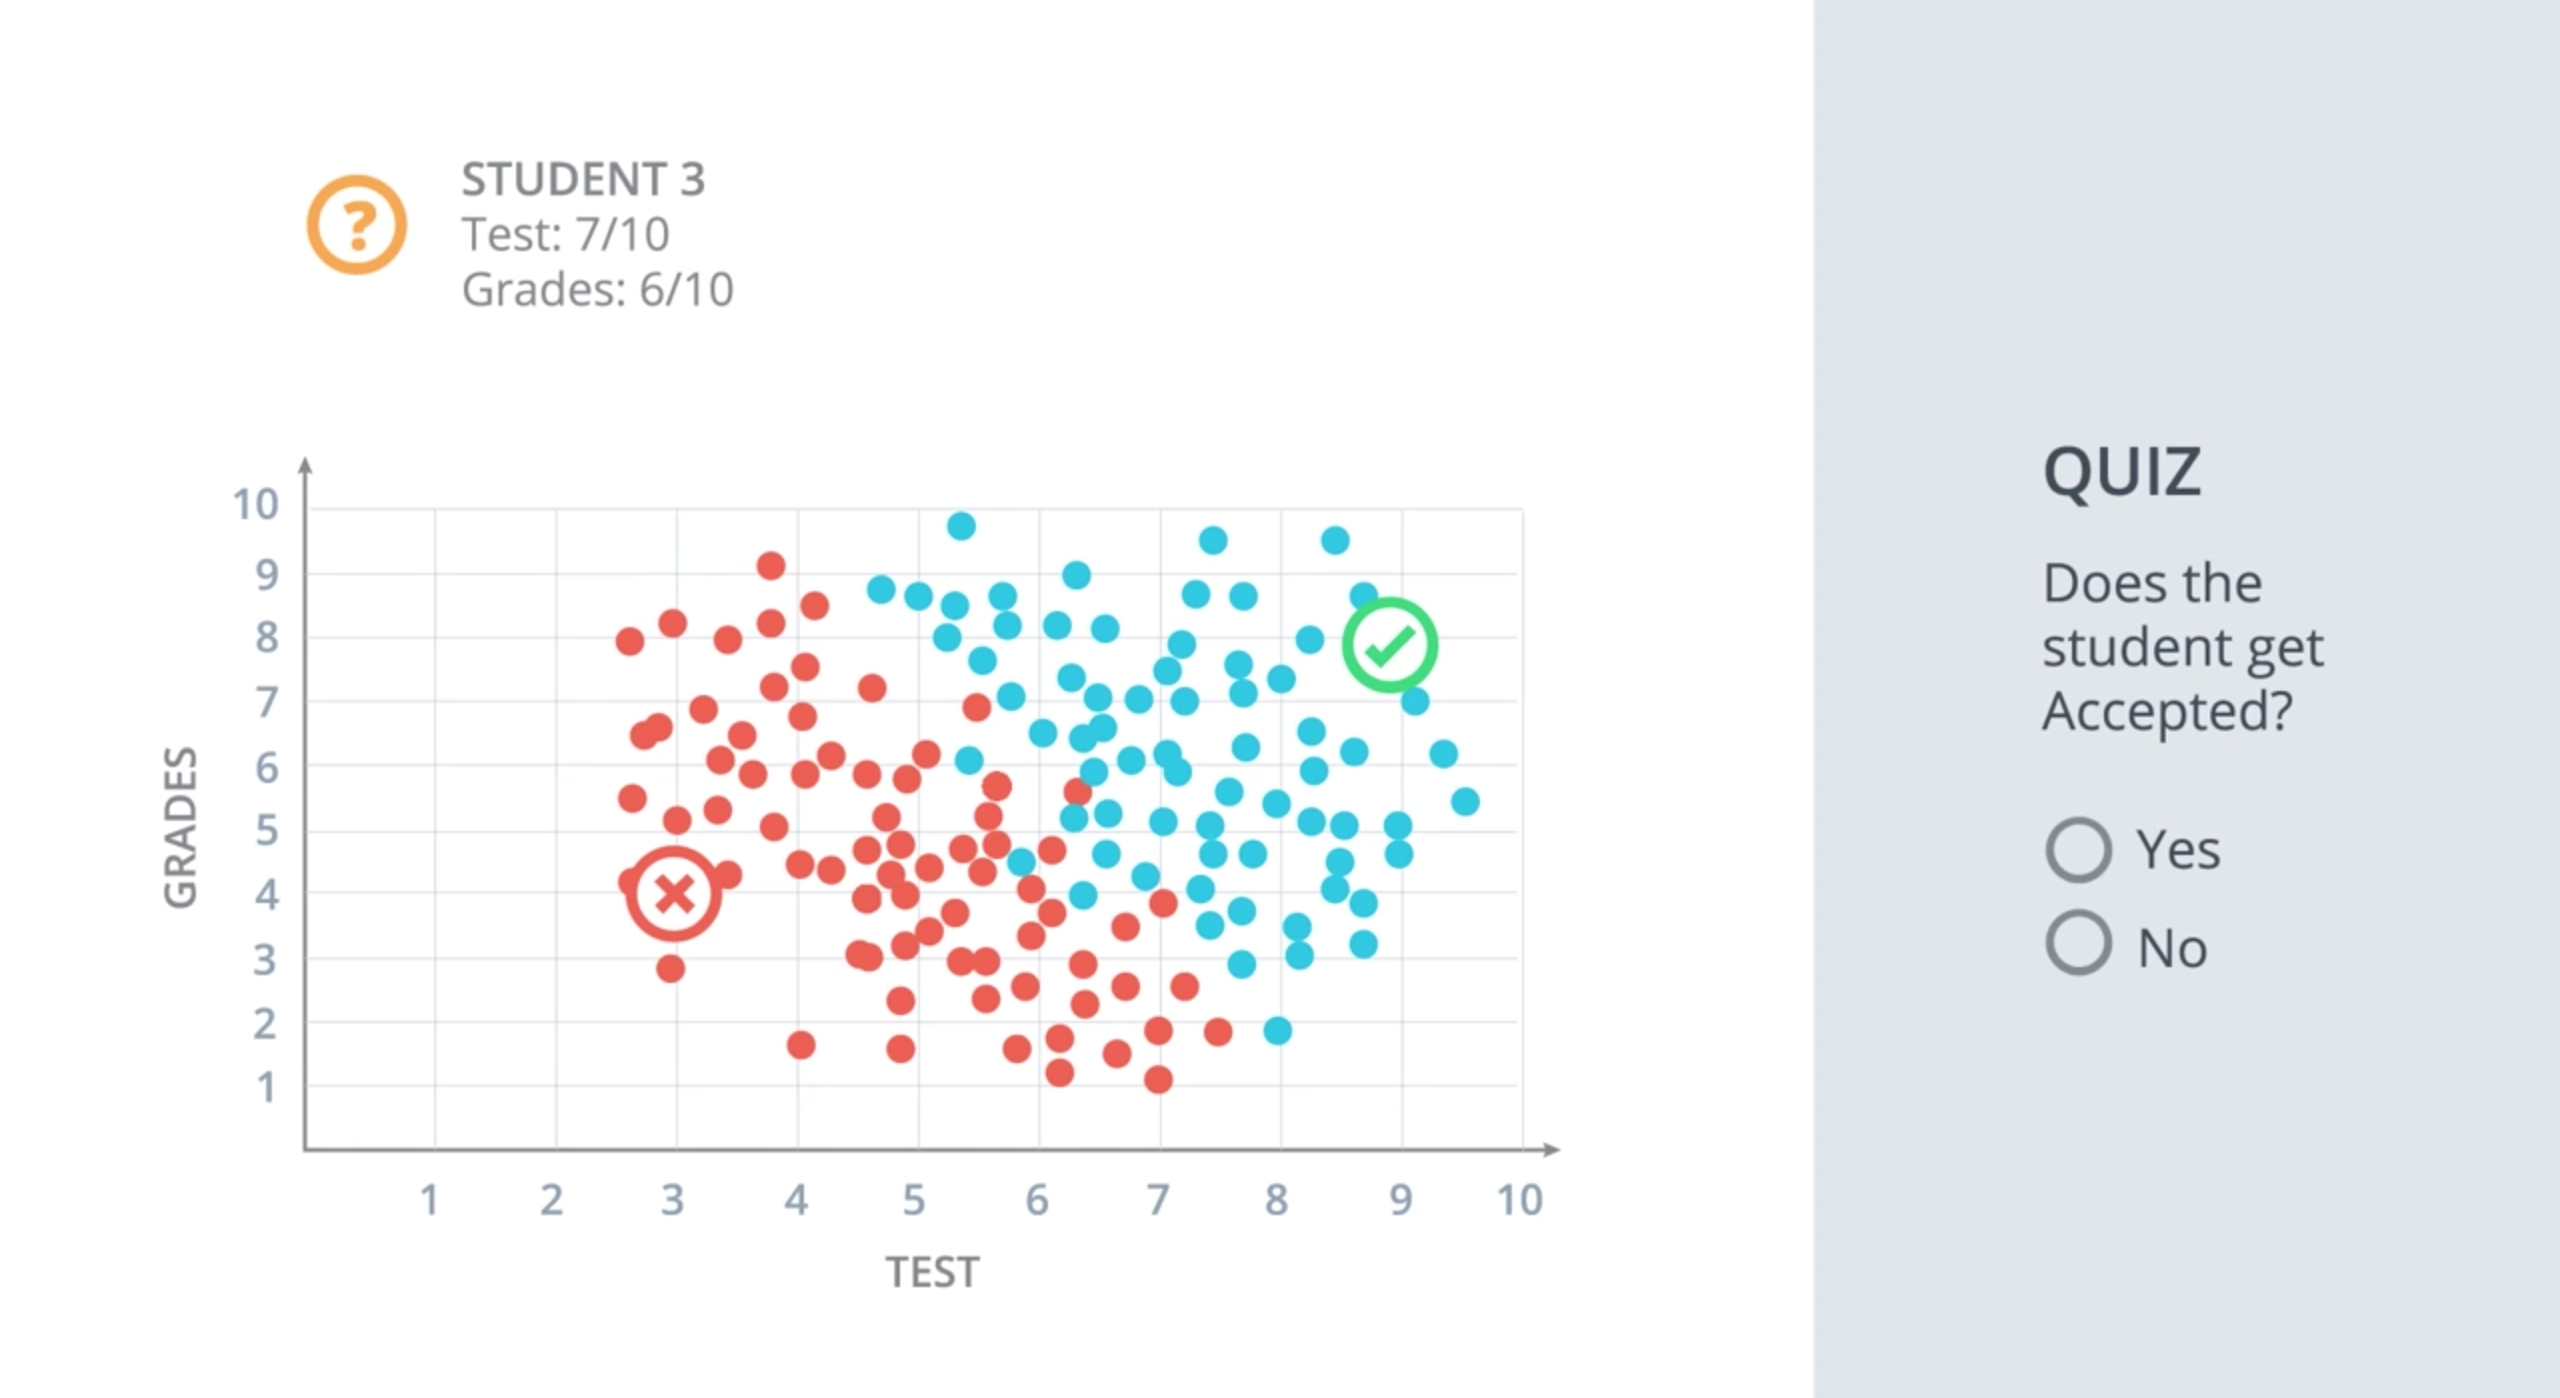

The Test Scores of students are on x-axis and Grades on y-axis. Red points denote students which were not accepted while blue points denote students that were accepted. 

A student with Test score 7/10 and Grade 6/10 is most likely to get accepted as it will fall somewhere in the blue region.

We need to find a line that can separate the blue and red regions so that the computer can accurately predict whether a new student is likely to be accepted or rejected. 

### Linear Boundaries

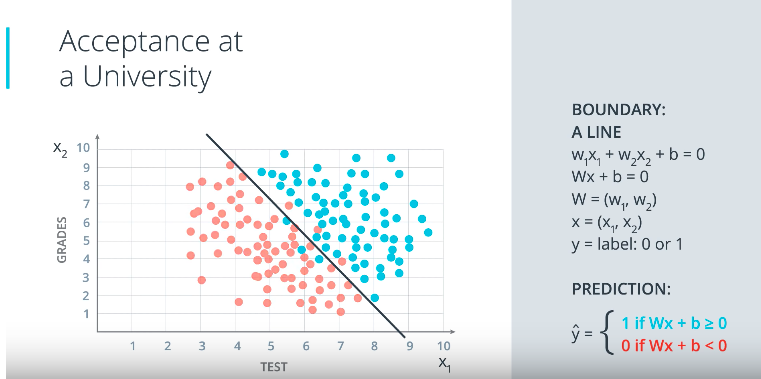

The equation for the line shown in the figure is **2x1 + x2 - 18 = 0**. Any point above the line lies in the blue region and similarly, any point below the line lies in the red region.

In general, a line separating two classes can be represented as **Wx + b = 0**, where the prediction *y hat* is 1 if **Wx + b >= 0** otherwise 0.

### Higher Dimensions

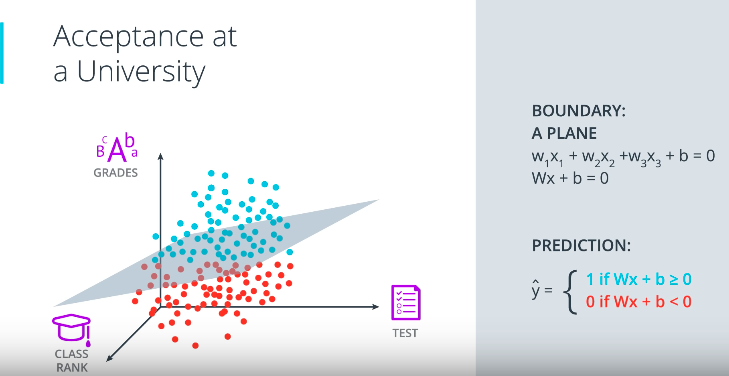

If we had three features to predict whether the student got accepted, the visualization can look something like shown above. Now, a **3D Plane** would be required to separate the two classes. Again, the equation of the boundary can be represented as **Wx + b = 0**. 

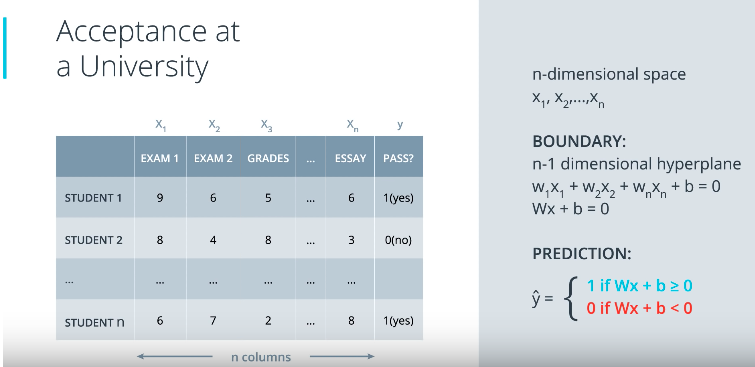

This can be further extended to **n dimensions**. The boundary will be a **n - 1** dimensional hyperplane. 

**QUIZ: Given the table above, what would the dimensions be for input features (x), the weights (W), and the bias (b) to satisfy (Wx + b)?**

Answer: **W** (1 x n), **x** (n x 1), **b** (1 x 1)

### Perceptrons

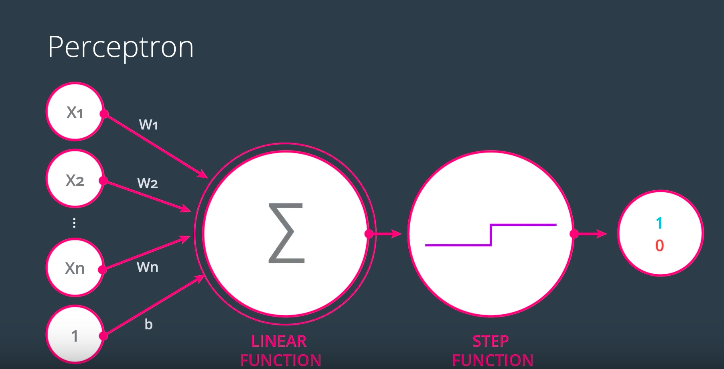

A **perceptron** is a building block for neural networks. Perceptrons look like neurons in the brain, thus the term **neural network**.

It takes as input the weights of the features and the bias. The linear function multiplies the weights with features, adds them up and the bias unit. 

The step function simply returns 1 if the output of linear function is non-negative, otherwise 0. 

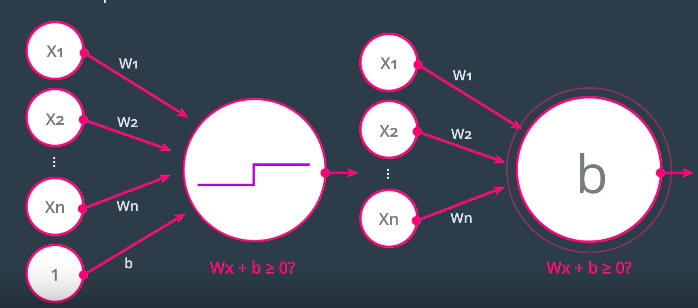

There are two ways of representing a perceptron. The one on the left has a **bias unit outside the node** whereas the one on the right has a **bias unit inside the node**. 

### Why "Neural Networks"?

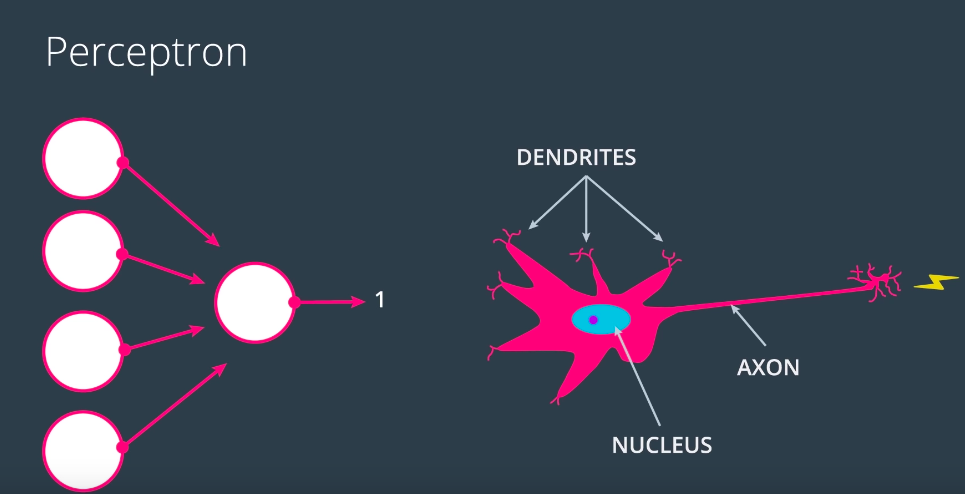

Neural network mimics the way brain connects neurons by taking output from one and turning into the input for anoter one, i.e. we concatenate many perceptrons together to form a network. 

### Perceptrons as Logical Operators

All the logical operators can be represented as perceptrons. The most common ones, AND, OR and NOT are shown below.

#### AND perceptron

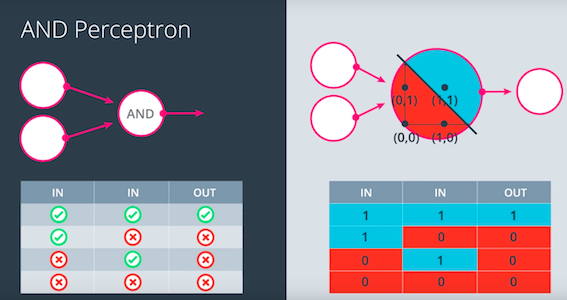

An AND perceptron returns 1 only when both the inputs are true. 

Play around the weights and bias in the code given below to see if you can create an **AND perceptron**.

In [1]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 0.50
weight2 = 0.50
bias = -1.0

# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                  -1.0                    0          Yes
      0          1                  -0.5                    0          Yes
      1          0                  -0.5                    0          Yes
      1          1                   0.0                    1          Yes


#### OR perceptron

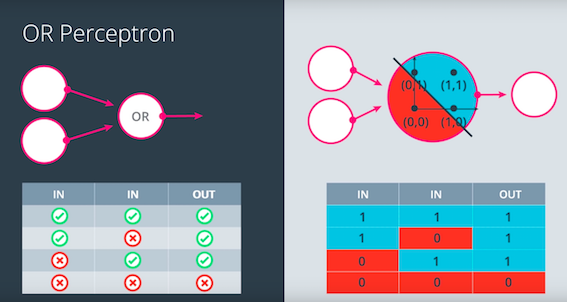

It return false only when both inputs are false, i.e. 0.

**QUIZ: What are two ways to go from an AND perceptron to an OR perceptron?**

**Answer:**
- Increasing the weights (becuase only when one of the input is true, output is true)
- Decreasing the magnitude of the bias (because when none of the inputs is true, output is false)

#### NOT perceptron

It is a unary perceptron and takes only one input. If the input is true, it returns false and vice-versa. In the code below, the 2nd input is given as input to the perceptron. 

In [4]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 0.0
weight2 = -1.0
bias = 0.5

# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                   0.5                    1          Yes
      0          1                  -0.5                    0          Yes
      1          0                   0.5                    1          Yes
      1          1                  -0.5                    0          Yes


#### XOR perceptron

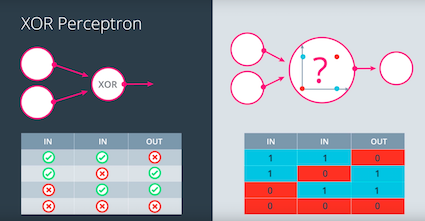

A XOR perceptron returns true when only one of the input is true. The points shown in the right side figure, seems hard to separate via a straight line. This is where a single perceptron is unable to separate the two classes. So, we use a multi-layer perceptron where we connect two or more perceptrons. 

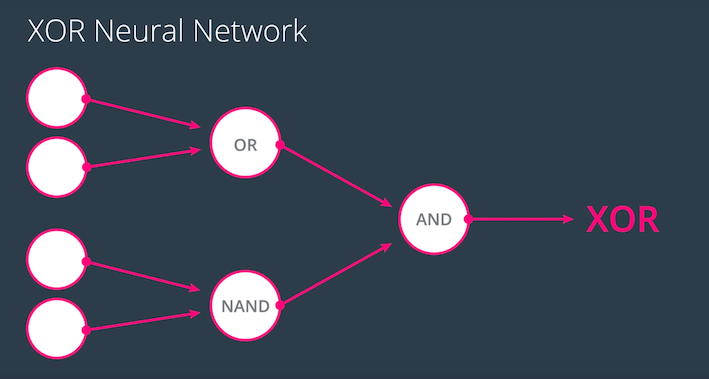

### Perceptron Trick

### Perceptron algorithm

In [3]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


### Non-linear regions

### Error functions

### Log-loss error function

### Discrete vs Continuous

### Softmax

In [4]:
import numpy as np

# Write a function that takes as input a list of numbers, and returns
# the list of values given by the softmax function.
def softmax(L):
    pass

### One-hot encoding

### Maximum likelihood

### Maximizing probabilities

### Cross-Entropy

In [5]:
import numpy as np

# Write a function that takes as input two lists Y, P,
# and returns the float corresponding to their cross-entropy.
def cross_entropy(Y, P):
    pass

### Multi-class Cross-Entropy

### Logistic Regression

### Gradient Descent

### Logistic Regression Algorithm

In [1]:
# GRADIENT DESCENT NOTEBOOK

## 13th November

### Perceptron vs Gradient Descent

### Continuous Perceptrons

### Non-linear Data

### Non-linear Models

### Neural Network Architecture

### Feedforward

### Backpropagation

In [2]:
# Analyzing Student Data Notebook